# Analysis of Student's Performance Data

## Table of Contents
<ul>
<li><a href="#EA">Exploratory Analysis</a></li>
<li><a href="#ML">Machine Learning in Action</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

### Loading the Data

In [4]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc= SparkContext()
sqlContext = SQLContext(sc)

df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true', delimiter=';').load('student-mat.csv')

In [9]:
df.printSchema()

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- goout: integer (null

<a id='EA'></a>
## Exploratory Analysis
> **DataSet**: It is student performance data derived from the University of Minho, Portugal. The task is a series of analytics questions focused on understanding the data and its relation to predicting the target(G3 >= 10).

> **Description**: Performing some simple exploratory analysis and generate summary statistics to get a sense of what is in the data.

### Tasks
    1.  Describe the quality of the data.
    2.	Generate a few charts that you feel conveys 2 or more important relationships in the data. 
    3.	Describe the relationship of the attributes with the final year scores(G1, G2, G3) and share any interesting insights you’ve found.


In [7]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
school,395,None,None,GP,MS
sex,395,None,None,F,M
age,395,16.696202531645568,1.2760427246056265,15,22
address,395,None,None,R,U
famsize,395,None,None,GT3,LE3
Pstatus,395,None,None,A,T
Medu,395,2.749367088607595,1.0947351414285371,0,4
Fedu,395,2.5215189873417723,1.0882005458269433,0,4
Mjob,395,None,None,at_home,teacher


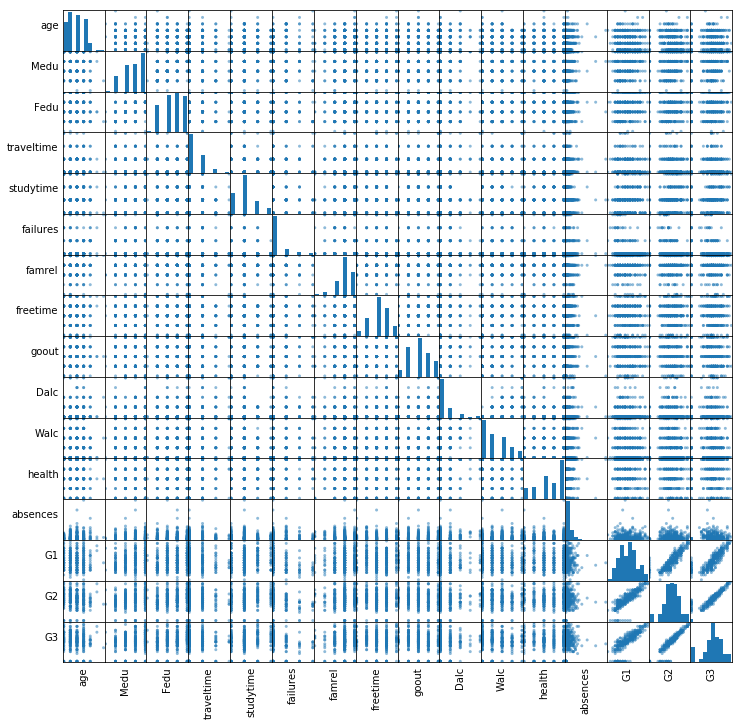

In [11]:
import pandas as pd

numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(12, 12))

# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

#### It's obvious that there are several highly correlated fields, ie G1 and G3.

In [13]:
import six
G = ['G1', 'G2', 'G3']
for i in df.columns:
    for j in G:
        if not( isinstance(df.select(i).take(1)[0][0], six.string_types)):
            print( "Correlation to ",j," for ", i, df.stat.corr(j,i))

Correlation to  G1  for  age -0.06408149744707395
Correlation to  G2  for  age -0.1434740490354591
Correlation to  G3  for  age -0.16157943813834033
Correlation to  G1  for  Medu 0.2053409967385873
Correlation to  G2  for  Medu 0.2155271676309025
Correlation to  G3  for  Medu 0.21714749613860554
Correlation to  G1  for  Fedu 0.19026993555786864
Correlation to  G2  for  Fedu 0.16489339339923353
Correlation to  G3  for  Fedu 0.1524569389042589
Correlation to  G1  for  traveltime -0.09303999158232112
Correlation to  G2  for  traveltime -0.15319796331721736
Correlation to  G3  for  traveltime -0.11714205281614887
Correlation to  G1  for  studytime 0.1606119154546958
Correlation to  G2  for  studytime 0.1358799992144901
Correlation to  G3  for  studytime 0.09781968965319622
Correlation to  G1  for  failures -0.3547176130156349
Correlation to  G2  for  failures -0.35589563455257417
Correlation to  G3  for  failures -0.3604149404616497
Correlation to  G1  for  famrel 0.022168315615496436
Corr

#### The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation. When the coefficient is close to –1, it means that there is a strong negative correlation. Finally, coefficients close to zero mean that there is no linear correlation.

<a id='ML'></a>
## Machine Learning in Action

> **Description**: Build a model to predict whether a given student is going to pass G3(score >= 10).

In [14]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = numeric_features, outputCol = 'features')
v_df = vectorAssembler.transform(df)
v_df = v_df.select(['features', 'G3'])
v_df.show(5)

+--------------------+---+
|            features| G3|
+--------------------+---+
|[18.0,4.0,4.0,2.0...|  6|
|[17.0,1.0,1.0,1.0...|  6|
|[15.0,1.0,1.0,1.0...| 10|
|[15.0,4.0,2.0,1.0...| 15|
|[16.0,3.0,3.0,1.0...| 10|
+--------------------+---+
only showing top 5 rows



In [15]:
splits = v_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [16]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='G3', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0916632758195,0.869685247127]
Intercept: 0.3798322831119216


### Analysis of Model

In [17]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 0.297359
r2: 0.995376


In [18]:
train_df.describe().show()

+-------+------------------+
|summary|                G3|
+-------+------------------+
|  count|               279|
|   mean|10.473118279569892|
| stddev| 4.380938266795185|
|    min|                 0|
|    max|                20|
+-------+------------------+



In [19]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","G3","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="G3",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+---+--------------------+
|        prediction| G3|            features|
+------------------+---+--------------------+
|  9.80999096093737| 10|[15.0,1.0,1.0,1.0...|
|0.3798322831119216|  0|[15.0,1.0,1.0,3.0...|
|14.800060127308504| 15|[15.0,1.0,2.0,1.0...|
| 9.123632265449341|  9|[15.0,1.0,2.0,1.0...|
|11.916014558469188| 12|[15.0,2.0,1.0,3.0...|
+------------------+---+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.994597


In [20]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 0.369504


In [21]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 11
objectiveHistory: [0.5, 0.36519021898436127, 0.0974192576138343, 0.08987274374576287, 0.07066859770654088, 0.06300705318430976, 0.060726833448092196, 0.06051512965774545, 0.06000485897064956, 0.05978411282207961, 0.05946769935120079]
+--------------------+
|           residuals|
+--------------------+
|0.006682487423690375|
| 0.04533396447725124|
| -0.2782381736635857|
|0.006682487423690375|
| 0.04533396447725124|
|-0.03196898962987049|
|-0.04632931134221...|
| 0.12263691858437475|
| 0.23859134974505736|
|-0.07062046668343136|
|-0.16228374250290223|
|  0.1999398726914965|
| 0.13699724029672034|
|-0.23958669661002485|
|-0.16228374250290223|
| 0.23859134974505736|
|  0.4462090567252126|
|-0.14792342079055487|
|-0.14792342079055487|
|-0.29259849537593396|
+--------------------+
only showing top 20 rows



In [22]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","G3","features").show()

+------------------+---+--------------------+
|        prediction| G3|            features|
+------------------+---+--------------------+
|  9.80999096093737| 10|[15.0,1.0,1.0,1.0...|
|0.3798322831119216|  0|[15.0,1.0,1.0,3.0...|
|14.800060127308504| 15|[15.0,1.0,2.0,1.0...|
| 9.123632265449341|  9|[15.0,1.0,2.0,1.0...|
|11.916014558469188| 12|[15.0,2.0,1.0,3.0...|
| 9.901654236756839| 10|[15.0,2.0,1.0,4.0...|
| 10.67967620806434| 11|[15.0,2.0,2.0,1.0...|
|13.747048328542595| 14|[15.0,2.0,2.0,1.0...|
|14.708396851489034| 15|[15.0,2.0,2.0,1.0...|
|11.916014558469188| 12|[15.0,2.0,3.0,1.0...|
| 8.070620466683431|  8|[15.0,2.0,3.0,1.0...|
|1.0214752138482124|  0|[15.0,3.0,2.0,1.0...|
|11.732688006830248| 12|[15.0,3.0,3.0,1.0...|
|12.007677834288657| 12|[15.0,3.0,4.0,1.0...|
|14.800060127308504| 15|[15.0,3.0,4.0,1.0...|
| 11.04632931134222| 11|[15.0,3.0,4.0,1.0...|
|0.3798322831119216|  0|[15.0,3.0,4.0,2.0...|
|0.3798322831119216|  0|[15.0,3.0,4.0,4.0...|
| 18.64545421909426| 19|[15.0,4.0,

<a id='conclusions'></a>
## Conclusions

> **Description**: Model created to determine G3 showed great results on Numeric Features. It would have been better if all features were taken in Consideration.

> **Disclaimer**: No help from any Individual was taken but as it was Take Home, I used plenty of Online Resources and Books.